In [1]:
import pandas as pd
import os
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data_path = '../data/' 

location_path = os.path.join(data_path, 'sdwpf_baidukddcup2022_turb_location.CSV')
location      = pd.read_csv(location_path)
location.describe()

,TurbID,x,y
count,134.000000,134.000000,134.000000
mean,67.500000,2666.760881,5986.126609
std,38.826537,1829.842484,3346.503906
min,1.000000,0.000000,0.000000
25%,34.250000,1014.935725,3182.294825
50%,67.500000,3246.541850,5841.894340
75%,100.750000,4320.609625,8814.832950
max,134.000000,5501.452900,12121.004260


In [3]:
data = pd.read_csv(os.path.join(data_path, 'wtbdata_245days.csv')) 
print(data.shape)
print(data.columns)
data.head()

(4727520, 13)
Index(['TurbID', 'Day', 'Tmstamp', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir',
       'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv'],
      dtype='object')


,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


In [4]:
data.fillna(method='bfill', inplace=True)
data['Patv'] = data['Patv'].apply(lambda x: max(0, x))

data.head()

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


In [5]:
data.describe()

,TurbID,Day,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
count,4.727520e+06,4.727520e+06,4.727520e+06,4.727520e+06,4.727520e+06,4.727520e+06,4.727520e+06,4.727520e+06,4.727520e+06,4.727520e+06,4.727520e+06,4.727520e+06
mean,6.750000e+01,1.230000e+02,5.057762e+00,4.800521e-01,4.110650e+01,2.740096e+01,1.880129e+02,2.674372e+01,2.671923e+01,2.671792e+01,-1.353280e+01,3.544651e+02
std,3.868139e+01,7.072483e+01,3.407044e+00,3.149749e+01,8.547043e+01,1.923756e+01,1.635187e+02,3.877513e+01,3.876421e+01,3.876229e+01,7.072137e+01,4.277302e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,-3.030460e+03,-2.730300e+02,-2.731700e+02,-8.848600e+02,-1.000000e+01,-1.000000e+01,-1.000000e+01,-6.249800e+02,0.000000e+00
25%,3.400000e+01,6.200000e+01,2.250000e+00,-3.800000e+00,1.412000e+01,2.011000e+01,6.128000e+01,1.000000e-02,1.000000e-02,1.000000e-02,-3.898000e+01,0.000000e+00
50%,6.750000e+01,1.230000e+02,4.370000e+00,-2.300000e-01,2.584000e+01,3.016000e+01,1.944000e+02,5.800000e-01,5.700000e-01,5.700000e-01,-3.000000e-01,1.814500e+02
75%,1.010000e+02,1.840000e+02,7.070000e+00,3.390000e+00,3.287000e+01,3.695000e+01,3.218500e+02,8.398000e+01,8.398000e+01,8.398000e+01,0.000000e+00,5.568900e+02
max,1.340000e+02,2.450000e+02,2.629000e+01,2.266950e+03,3.943300e+02,3.242100e+02,7.006200e+02,9.998000e+01,9.998000e+01,9.998000e+01,4.852000e+02,1.567020e+03


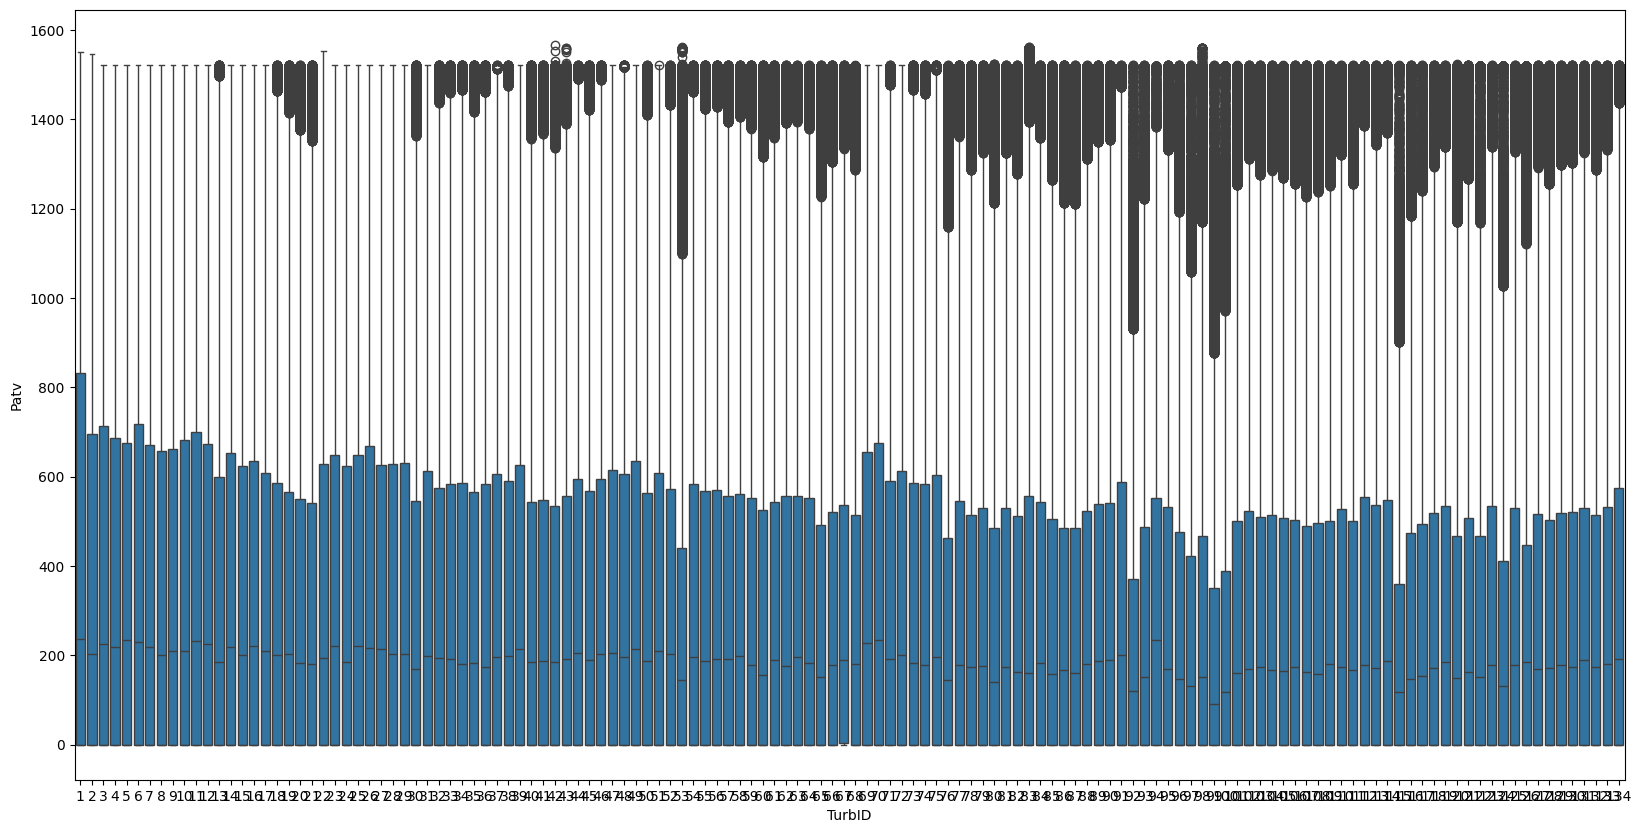

In [6]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, x='TurbID', y='Patv')
plt.show()

### 快速傅里叶变换查看周期变化


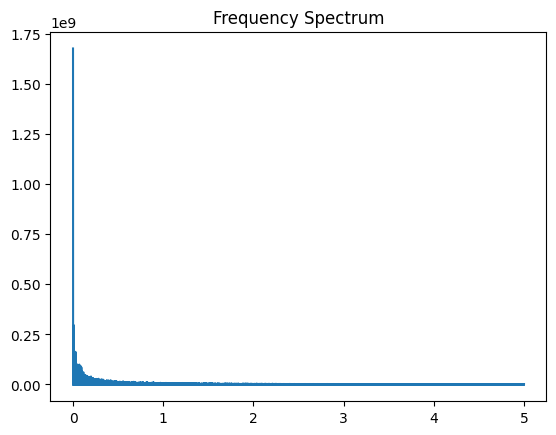

In [9]:
from scipy.fft import fft


# 进行傅里叶变换
signals = data['Patv'].values
n = len(signals)
# 采样频率
fs = 1 / 10  # 10 分钟一次采样
frequencies = np.fft.fftfreq(n, d=fs)
spectrum = np.abs(fft(signals))


# 绘制频谱图
plt.plot(frequencies[:n//2], spectrum[:n//2])
plt.title('Frequency Spectrum')
plt.show()


## 异常值处理
### 异常值判别：
1. 超过 $[\mu - 3\sigma, \mu + 3\sigma]$;
2. Ndir 超出$[-720^{\degree}, 720]$的Patv是异常的；
3. Wdir 超出$[-180, 180]$的Patv是异常的；

In [7]:
outliers1 = (data['Ndir'] > 720) | (data['Ndir'] < -720)
outliers2 = (data['Wdir'] > 180) | (data['Wdir'] < -180)
print(f'len(outliers1): {outliers1.sum()}, len(outliers2): {outliers2.sum()}')

mean_, std_ = data['Patv'].mean(), data['Patv'].std()
print(f'mean_: {mean_}, std_: {std_}')
outliers3 = (data['Patv'] > mean_ + 3 * std_) | (data['Patv'] < mean_ - 3 * std_)
print(f'len(outliers3): {outliers3.sum()}')

len(outliers1): 49, len(outliers2): 78
mean_: 354.4651254907436, std_: 427.7301581210253
len(outliers3): 0


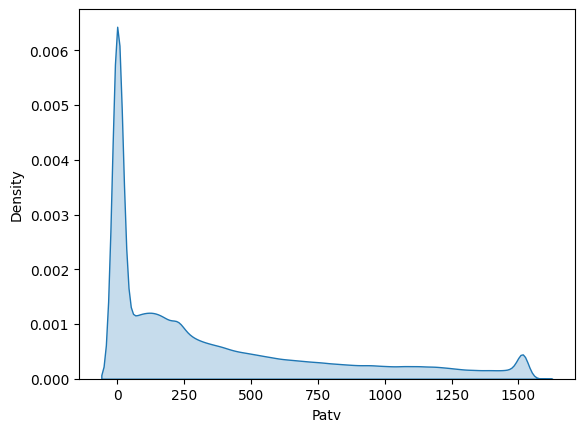

In [8]:
sns.kdeplot(data=data, x='Patv', fill=True)
plt.show()

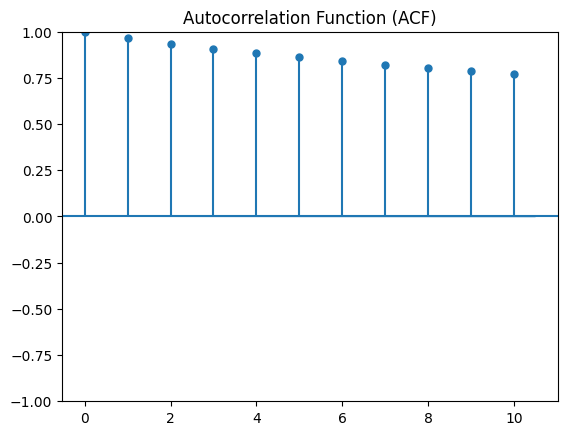

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 绘制自相关图
plot_acf(data['Patv'][:1000000], lags=10)  # 指定lags为延迟的数量
plt.title('Autocorrelation Function (ACF)')
plt.show()

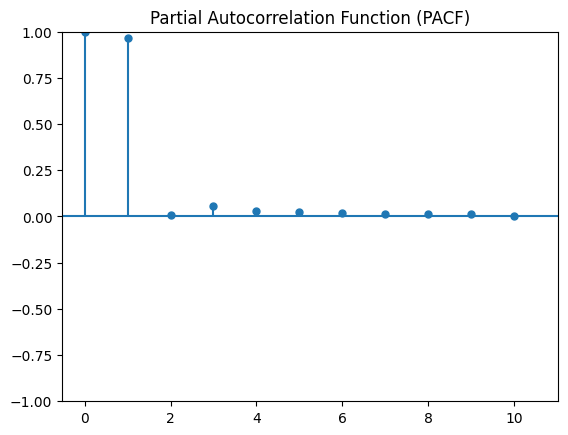

In [11]:
# 绘制偏自相关图
plot_pacf(data['Patv'][:1000000], lags=10)  # 指定lags为延迟的数量
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [7]:
# df_train = data[data['Day'] <= 200]
# df_val = data[data['Day'] > 200 & (data['Day'] <= 220)]
# df_test = data[data['Day'] > 220]

data['cat'] = data['Day'].apply(lambda x: 'train' if x <= 205 else 'val' if x <= 225 else 'test')
data.head()

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,cat
0,1,1,00:00,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,train
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,train
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76,train
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53,train
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36,train


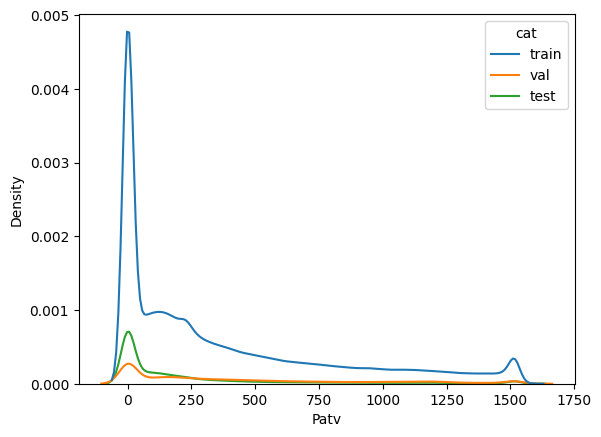

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# train 200
sns.kdeplot(data = data, x = 'Patv', hue='cat')
plt.show()

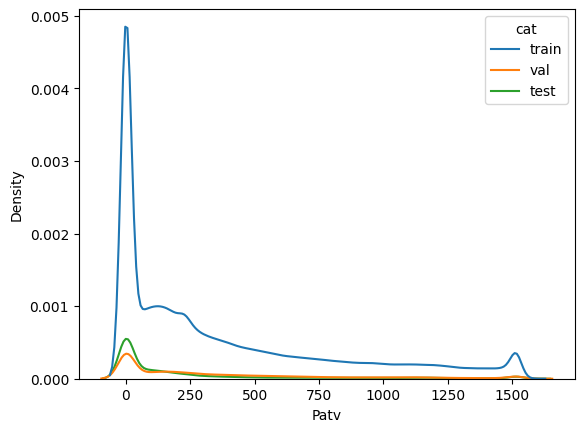

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# train 205
sns.kdeplot(data = data, x = 'Patv', hue='cat')
plt.show()

In [25]:
x1 = data[data['TurbID'] == 1]
x1.shape

(35280, 13)

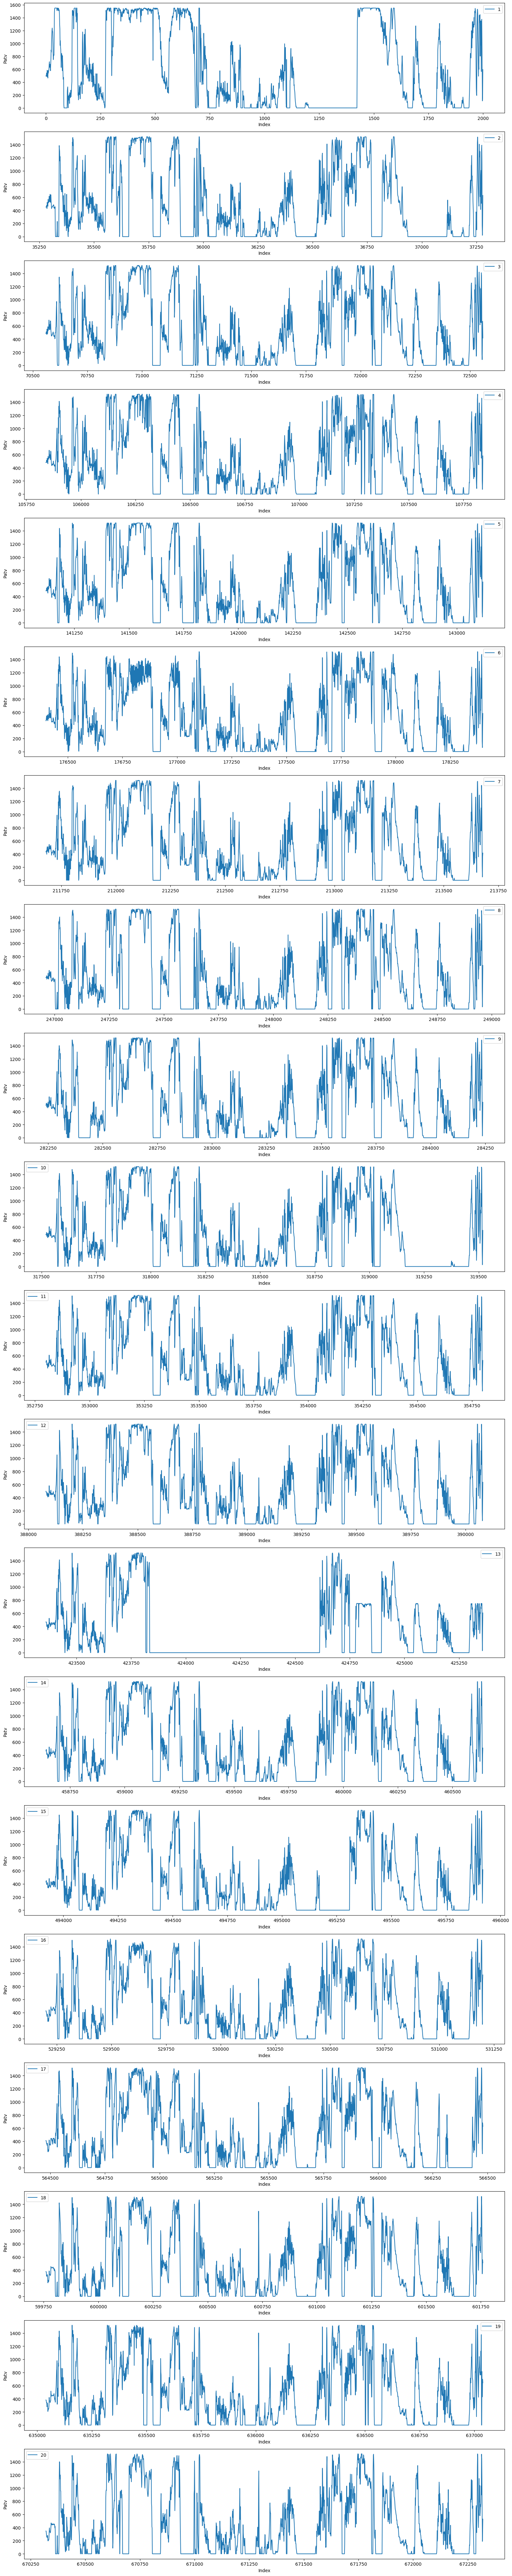

In [26]:
grouped_data = data.groupby('TurbID')
index_show = 2000
num_show = 20

fig, axes = plt.subplots(num_show, 1, figsize=(16, 4*num_show))

for i, (group_name, group_data) in enumerate(grouped_data):
    if i > num_show - 1:
        break
    else:
        ax = axes[i]
        ax.plot(group_data['Patv'][:index_show], label=group_name)
        ax.set_xlabel('Index')
        ax.set_ylabel('Patv')
        ax.legend()

plt.tight_layout()
# plt.savefig(f'../images/Patv分TurbID展示_{num_show}.png', dpi=300)
plt.show()

In [ ]:
df_train = pd.merge(df_train, location, on='TurbID', how='left')
print(df_train.shape)
print(df_train.columns)
df_train.head()

(4727520, 15)
Index(['TurbID', 'Day', 'Tmstamp', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir',
       'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv', 'x', 'y'],
      dtype='object')


,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,x,y
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3349.8515,5939.23193
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,3349.8515,5939.23193
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76,3349.8515,5939.23193
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53,3349.8515,5939.23193
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36,3349.8515,5939.23193


In [ ]:
df_train.describe()

,TurbID,Day,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,x,y
count,4.727520e+06,4.727520e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.727520e+06,4.727520e+06
mean,6.750000e+01,1.230000e+02,5.028376e+00,4.975428e-01,4.110668e+01,2.739717e+01,1.885826e+02,2.685400e+01,2.683916e+01,2.682679e+01,-1.323900e+01,3.504458e+02,2.666761e+03,5.986127e+03
std,3.868139e+01,7.072483e+01,3.393703e+00,3.160275e+01,8.529011e+01,1.832832e+01,1.632459e+02,3.883566e+01,3.882940e+01,3.882235e+01,7.044244e+01,4.249932e+02,1.823002e+03,3.333994e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,-3.030460e+03,-2.730300e+02,-2.731700e+02,-8.848600e+02,-1.000000e+01,-1.000000e+01,-1.000000e+01,-6.249800e+02,-9.330000e+00,0.000000e+00,0.000000e+00
25%,3.400000e+01,6.200000e+01,2.240000e+00,-3.830000e+00,1.405000e+01,2.006000e+01,6.302000e+01,1.000000e-02,1.000000e-02,1.000000e-02,-3.861000e+01,-3.000000e-01,1.014317e+03,3.134452e+03
50%,6.750000e+01,1.230000e+02,4.340000e+00,-2.300000e-01,2.573000e+01,3.008000e+01,1.947900e+02,5.400000e-01,5.400000e-01,5.400000e-01,-3.000000e-01,1.790800e+02,3.246542e+03,5.841894e+03
75%,1.010000e+02,1.840000e+02,7.010000e+00,3.420000e+00,3.273000e+01,3.682000e+01,3.219600e+02,8.399000e+01,8.398000e+01,8.398000e+01,-3.000000e-02,5.476600e+02,4.320683e+03,8.816238e+03
max,1.340000e+02,2.450000e+02,2.629000e+01,2.266950e+03,3.943300e+02,3.242100e+02,7.006200e+02,9.998000e+01,9.998000e+01,9.998000e+01,4.852000e+02,1.567020e+03,5.501453e+03,1.212100e+04


In [ ]:
df_train.groupby(['Day'])['Wspd'].count()

Day
1      19151
2      19280
3      19280
4      19282
5      19281
       ...  
241    19284
242    19270
243    19283
244    19285
245    19283
Name: Wspd, Length: 245, dtype: int64

In [8]:
df_train.groupby('TurbID')['Day'].value_counts()

TurbID  Day
1       1      144
        2      144
        81     144
        94     144
        93     144
              ... 
134     156    144
        155    144
        154    144
        153    144
        245    144
Name: count, Length: 32830, dtype: int64

每个风机有245天的数据；
每10min采样一次，一个钟6个点，一天144个点，245天共计35280个点。

In [9]:
# df_train['time'] = pd.to_datetime(df_train['Tmstamp'], format='%H:%M')
# df_train['minute'] = df_train['time'].dt.minute
# df_train.head()

In [10]:
# df_train.fillna(method='ffill', inplace=True)

print(f'Wspd缺失比例：', df_train['Wspd'].isna().sum() / len(df_train))
df_train.isna().sum()

Wspd缺失比例： 0.010474413646055437


TurbID         0
Day            0
Tmstamp        0
Wspd       49518
Wdir       49518
Etmp       49518
Itmp       49518
Ndir       49518
Pab1       49518
Pab2       49518
Pab3       49518
Prtv       49518
Patv       49518
x              0
y              0
dtype: int64

In [11]:
print(df_train.columns)
print(df_train.select_dtypes(include='number').columns)

Index(['TurbID', 'Day', 'Tmstamp', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir',
       'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv', 'x', 'y'],
      dtype='object')
Index(['TurbID', 'Day', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2',
       'Pab3', 'Prtv', 'Patv', 'x', 'y'],
      dtype='object')


In [12]:
def fill_missing(df, groupby_label='TurbID', method='mean'):
    """
    缺失值填补. 
    """
    continuous_cols  = df.select_dtypes(include='number').columns
    catogorical_cols = df.select_dtypes(exclude='number').columns
    print(f'连续变量有：{continuous_cols}\n'
          f'非连续变量有： {catogorical_cols}')
    
    for col in tqdm(df.columns):
        if col in continuous_cols:
            # 用每个风机该变量的均值进行缺失值填充
            df[col].fillna(df.groupby(groupby_label)[col].transform(method), inplace=True)
        else:
            # 用每个风机类别变量的众数进行缺失值填充
            df[col].fillna(df.groupby(groupby_label)[col].transform(lambda x: x.mode()[0]), inplace=True)

    print(f'缺失值个数： {df.isna().sum().sum()}')

    return df
# df_train = fill_missing(df_train)

In [13]:
print(f'缺失值个数： {df_train.isna().sum().sum()}')
df_train.fillna(method='bfill', inplace=True)
print(f'缺失值个数： {df_train.isna().sum().sum()}')
df_train.head()

缺失值个数： 495180
缺失值个数： 0


,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,x,y
0,1,1,00:00,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,3349.8515,5939.23193
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,3349.8515,5939.23193
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76,3349.8515,5939.23193
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53,3349.8515,5939.23193
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36,3349.8515,5939.23193


## 逐个构建训练集

In [14]:
df_train['TurbID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134], dtype=int64)

In [15]:
class Scaler(object):
    def __init__(self):
        self.mean = 0.
        self.std = 1.

    def fit(self, data):
        self.mean = np.mean(data)
        self.std = np.std(data)

    def transform(self, data):
        mean = torch.tensor(self.mean).to(data.device) if torch.is_tensor(data) else self.mean
        std = torch.tensor(self.std).to(data.device) if torch.is_tensor(data) else self.std
        return (data - mean) / std

    def inverse_transform(self, data):
        mean = torch.tensor(self.mean) if torch.is_tensor(data) else self.mean
        std = torch.tensor(self.std) if torch.is_tensor(data) else self.std
        return (data * std) + mean

class WindTurbineDataset(Dataset):
    def __init__(self, data_path, 
                 filename='my.csv', 
                 flag='train', 
                 size=None, 
                 turbine_id=0, 
                 task='MS', 
                 target='Target',
                 scale=True, 
                 start_col=2, 
                 day_len=24 * 6, 
                 train_days=15, 
                 val_days=3, 
                 test_days=6, 
                 total_days=30):
        super().__init__()
        self.unit_size = day_len
        if size is None:
            self.input_len = self.unit_size
            self.output_len = self.unit_size
        else:
            self.input_len = size[0]
            self.output_len = size[1]
        assert flag in ['train', 'test', 'val']
        type_map = {'train': 0, 'val': 1, 'test': 2}
        self.set_type = type_map[flag]
        self.task = task
        self.target = target
        self.scale = scale
        self.start_col = start_col
        self.data_path = data_path
        self.filename = filename
        self.tid = turbine_id
        self.total_size = self.unit_size * total_days
        self.train_size = train_days * self.unit_size
        self.val_size = val_days * self.unit_size
        self.test_size = test_days * self.unit_size
        self.__read_data__()

    def __read_data__(self):
        self.scaler = Scaler()
        df_raw = pd.read_csv(os.path.join(self.data_path, self.filename))
        border1s = [self.tid * self.total_size,
                    self.tid * self.total_size + self.train_size - self.input_len,
                    self.tid * self.total_size + self.train_size + self.val_size - self.input_len
                    ]
        border2s = [self.tid * self.total_size + self.train_size,
                    self.tid * self.total_size + self.train_size + self.val_size,
                    self.tid * self.total_size + self.train_size + self.val_size + self.test_size
                    ]
        border1 = border1s[self.set_type]
        border2 = border2s[self.set_type]

        df_data = df_raw
        if self.task == 'M':
            cols_data = df_raw.columns[self.start_col:]
            df_data = df_raw[cols_data]
        elif self.task == 'MS':
            cols_data = df_raw.columns[self.start_col:]
            df_data = df_raw[cols_data]
        elif self.task == 'S':
            df_data = df_raw[[self.tid, self.target]]

        pd.set_option('mode.chained_assignment', None)
        df_data.replace(to_replace=np.nan, value=0, inplace=True)

        if self.scale:
            train_data = df_data[border1s[0]:border2s[0]]
            self.scaler.fit(train_data.values)
            data = self.scaler.transform(df_data.values)
        else:
            data = df_data.values
        self.data_x = data[border1:border2]
        self.data_y = data[border1:border2]
        self.raw_data = df_data[border1 + self.input_len:border2]

    def __getitem__(self, index):
        if self.set_type >= 3:
            index = index * self.output_len
        s_begin = index
        s_end = s_begin + self.input_len
        r_begin = s_end
        r_end = r_begin + self.output_len
        seq_x = torch.from_numpy(self.data_x[s_begin:s_end])
        seq_y = torch.from_numpy(self.data_y[r_begin:r_end])
        return seq_x, seq_y

    def __len__(self):
        if self.set_type < 3:
            return len(self.data_x) - self.input_len - self.output_len + 1
        return int((len(self.data_x) - self.input_len) / self.output_len)

    def inverse_transform(self, data):
        return self.scaler.inverse_transform(data)

In [16]:
data_path  = '../data/train/'
filename   = 'wtbdata_245days.csv'
flag       = 'train'
input_len  = 144
output_len = 288
size       = [input_len, output_len]
task       = 'MS'
target     = 'Patv'
start_col  = 3
turbine_id = 0
day_len    = 144
train_days = 153
val_days   = 16
test_days  = 15
total_days = 184

data_set = WindTurbineDataset(
    data_path  = data_path,
    filename   = filename,
    flag       = flag,
    size       = size,
    task       = task,
    target     = target,
    start_col  = start_col,
    turbine_id = turbine_id,
    day_len    = day_len,
    train_days = train_days,
    val_days   = val_days,
    test_days  = test_days,
    total_days = total_days
)

In [17]:
x, y = data_set[1]
print(len(data_set))
print(x.shape, y.shape)
x[1]

21601
torch.Size([144, 10]) torch.Size([288, 10])


tensor([-0.2881, -0.3244, -0.1839, -0.1366, -0.2254, -0.3107, -0.3107, -0.3107,
        -0.3161,  1.8702], dtype=torch.float64)

In [18]:
data_set.inverse_transform(x[1])

tensor([ 6.2700e+00, -2.1800e+00,  3.0600e+01,  4.1630e+01,  2.0910e+01,
         1.0000e+00,  1.0000e+00,  1.0000e+00, -2.4000e-01,  5.0976e+02],
       dtype=torch.float64)

In [19]:
data_set.inverse_transform(x[:10])

tensor([[ 6.1700e+00, -3.9900e+00,  3.0730e+01,  4.1800e+01,  2.5920e+01,
          1.0000e+00,  1.0000e+00,  1.0000e+00, -2.5000e-01,  4.9466e+02],
        [ 6.2700e+00, -2.1800e+00,  3.0600e+01,  4.1630e+01,  2.0910e+01,
          1.0000e+00,  1.0000e+00,  1.0000e+00, -2.4000e-01,  5.0976e+02],
        [ 6.4200e+00, -7.3000e-01,  3.0520e+01,  4.1520e+01,  2.0910e+01,
          1.0000e+00,  1.0000e+00,  1.0000e+00, -2.6000e-01,  5.4253e+02],
        [ 6.2500e+00,  8.9000e-01,  3.0490e+01,  4.1380e+01,  2.0910e+01,
          1.0000e+00,  1.0000e+00,  1.0000e+00, -2.3000e-01,  5.0936e+02],
        [ 6.1000e+00, -1.0300e+00,  3.0470e+01,  4.1220e+01,  2.0910e+01,
          1.0000e+00,  1.0000e+00,  1.0000e+00, -2.7000e-01,  4.8221e+02],
        [ 6.7700e+00,  1.0700e+00,  3.0310e+01,  4.1190e+01,  2.0910e+01,
          1.0000e+00,  1.0000e+00,  1.0000e+00, -2.3000e-01,  5.8475e+02],
        [ 6.7000e+00, -2.8000e+00,  3.0240e+01,  4.1000e+01,  2.0910e+01,
          1.0000e+00,  1.0000e+0

In [20]:
print(df_train.shape)
df_train.head()

(4727520, 15)


,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,x,y
0,1,1,00:00,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,3349.8515,5939.23193
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,3349.8515,5939.23193
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76,3349.8515,5939.23193
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53,3349.8515,5939.23193
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36,3349.8515,5939.23193


In [21]:
x1 = df_train[df_train['TurbID'] == 1]
x1.shape

(35280, 15)